Sentiment counts:
 sentiment
Negative      21787
Positive      19811
Neutral       17800
Irrelevant    12584
Name: count, dtype: int64


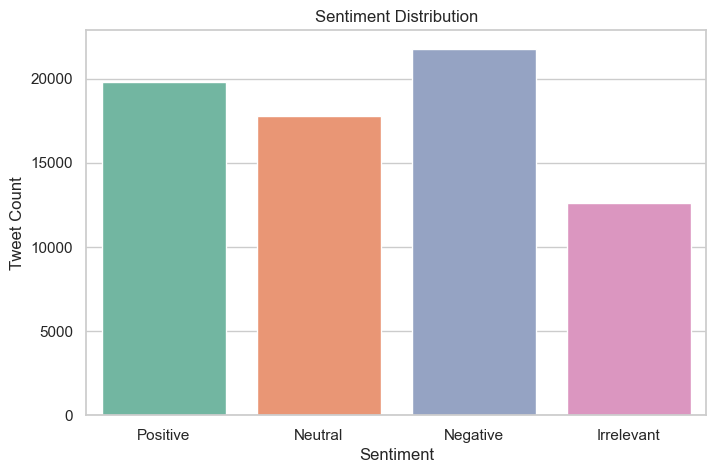

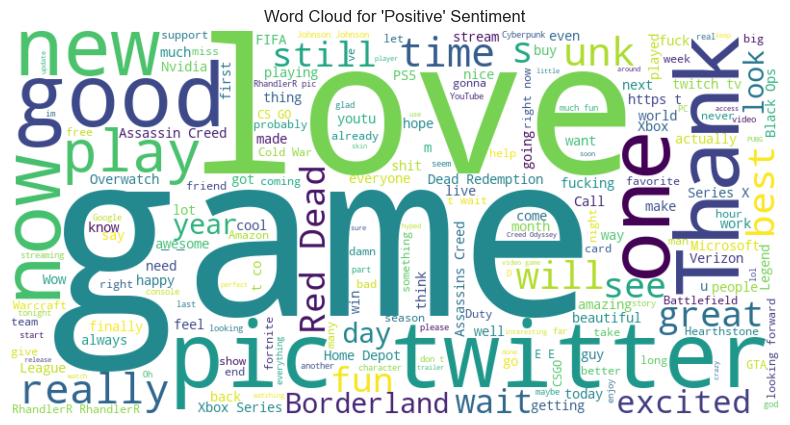

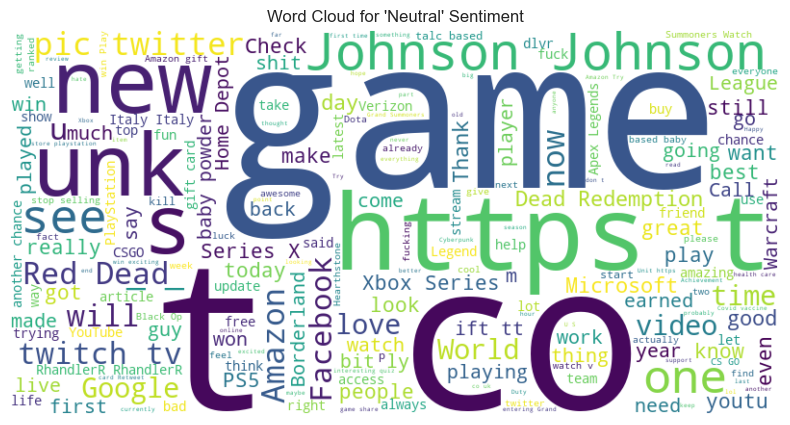

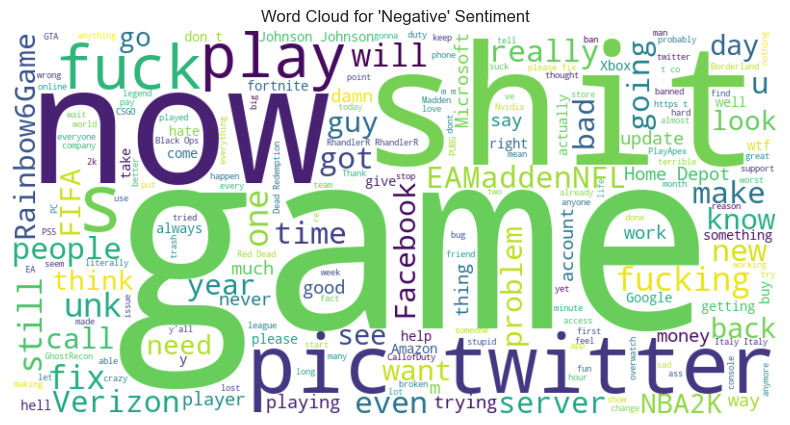

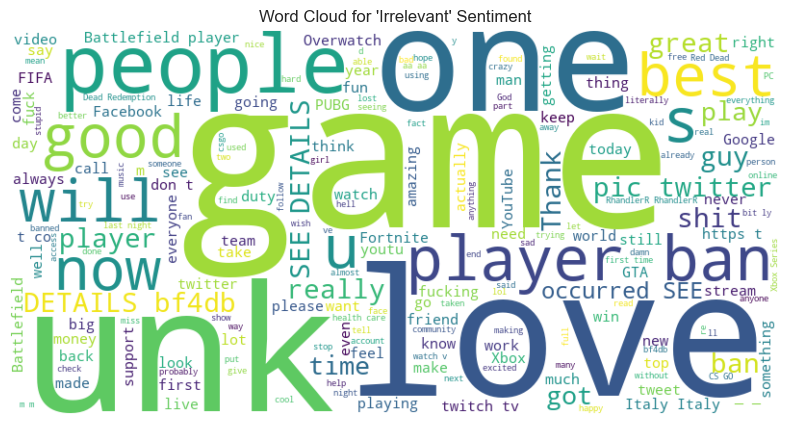

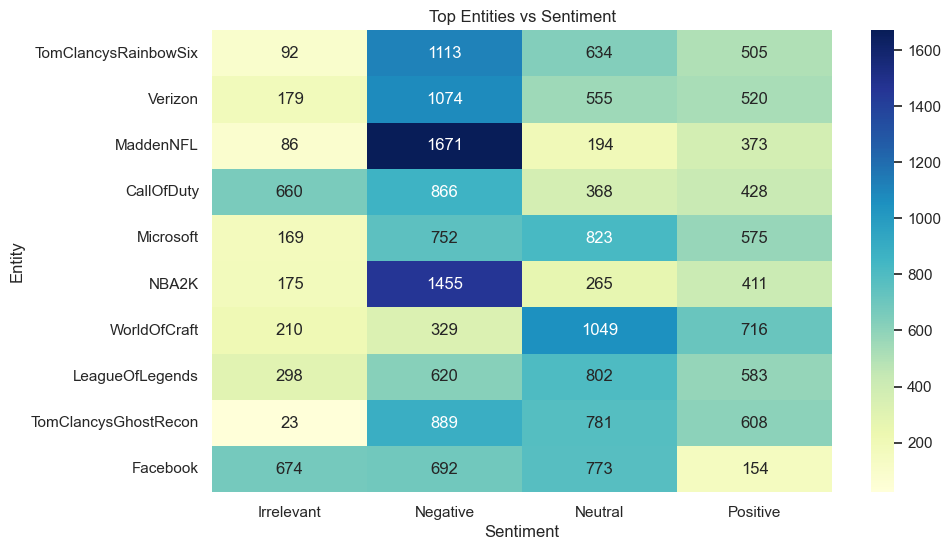

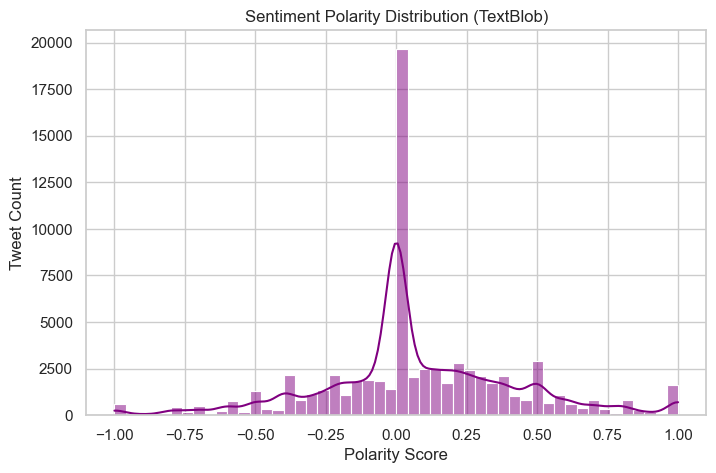

                                                 content  polarity
18768  how do I tell the youtube ads I’m not a Gamer™...  0.200000
8009   The Overwatch team I'm into won their stream g...  0.133333
56631       No point entering now, ive already won xoxox  0.000000
35409  Only nobody would be banned from Microsoft the...  0.000000
70455                                       3080 cant on  0.000000


In [5]:
# Install required packages (run only once)
!pip install pandas matplotlib seaborn wordcloud textblob

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

# Set plot style
sns.set(style='whitegrid')

# Load dataset (make sure twitter_training.csv is in the same folder as your .ipynb)
df = pd.read_csv("twitter_training.csv", header=None)
df.columns = ['id', 'entity', 'sentiment', 'content']

# Drop duplicates
df.drop_duplicates(inplace=True)

# Handle any missing content
df['content'] = df['content'].astype(str)

# Plot sentiment distribution
print("Sentiment counts:\n", df['sentiment'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', hue='sentiment', palette='Set2', legend=False)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

# Word clouds for each sentiment
def generate_wordcloud(sentiment_label):
    subset = df[df['sentiment'] == sentiment_label]['content'].dropna().astype(str)
    text = ' '.join(subset)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for '{sentiment_label}' Sentiment")
    plt.show()

# Generate wordclouds for each unique sentiment
for sentiment in df['sentiment'].unique():
    generate_wordcloud(sentiment)

# Heatmap of top entities vs sentiment
entity_sentiment = df.pivot_table(index='entity', columns='sentiment', aggfunc='size', fill_value=0)
top_entities = entity_sentiment.sum(axis=1).sort_values(ascending=False).head(10)
entity_sentiment_top = entity_sentiment.loc[top_entities.index]

plt.figure(figsize=(10, 6))
sns.heatmap(entity_sentiment_top, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Top Entities vs Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Entity")
plt.show()

# Sentiment polarity using TextBlob
df['polarity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(8, 5))
sns.histplot(df['polarity'], bins=50, kde=True, color='purple')
plt.title("Sentiment Polarity Distribution (TextBlob)")
plt.xlabel("Polarity Score")
plt.ylabel("Tweet Count")
plt.show()

# Show a few sample tweets with polarity scores
print(df[['content', 'polarity']].sample(5))
